_____
### Distribución de objetos en función del redshift

Text(0.5,1,'Histograma de Frecuencia Acumulada en distancia (redshift)')

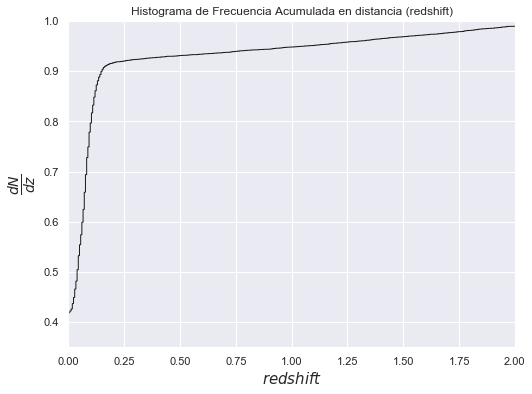

In [30]:
sns.set()
plt.figure(figsize=(8, 6))
plt.hist(df.redshift, bins=int(1e3), 
         histtype='step',
         density=True, cumulative=True,
        color='k')
plt.xlim(0, 2.)
plt.ylim(0.35, 1.0)
plt.xlabel(r'$redshift$', size=15)
plt.ylabel(r'$\frac{dN}{dz}$', size=20)
plt.title('Histograma de Frecuencia Acumulada en distancia (redshift)')

Alrededor del $90\%$ de los objetos de nuestro dataset está concentrado en un redshift de hasta $0.20$.

Echemos un vistazo a la distribución de los objetos en **coordenadas ecuatoriales**:

**En proyección [Mollweide](https://es.wikipedia.org/wiki/Proyecci%C3%B3n_de_Mollweide)**:

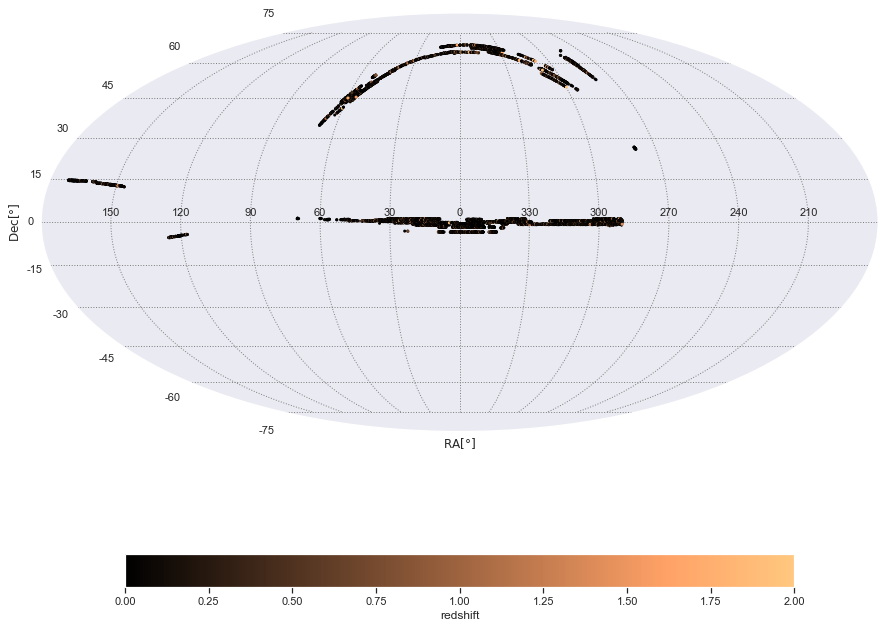

In [31]:
plt.figure(figsize=(15, 15))
ax = plt.axes(projection='mollweide')

plt.scatter(np.radians(df.ra-180), np.radians(df.dec), 
            marker = '.', c = df.redshift,
            cmap=plt.cm.copper, 
            vmin = 0, vmax = 2.0, 
            linewidths = 0., zorder = 10)
plt.colorbar(orientation = 'horizontal', shrink = 0.8, label='redshift')
plt.grid(linestyle='dotted', color='grey')

tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels_y = np.array([-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75])
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels_y)

ax.set_xlabel(r'$\mathrm{RA[\degree]}$')
ax.xaxis.label.set_fontsize(12)
ax.set_ylabel(r'$\mathrm{Dec[\degree]}$')
ax.yaxis.label.set_fontsize(12)

**En coordenadas polares**:

In [32]:
gb_class = df.groupby('class')
# Split DataFrame grouped by classes
splitted_df = [gb_class.get_group(x) for x in gb_class.groups]

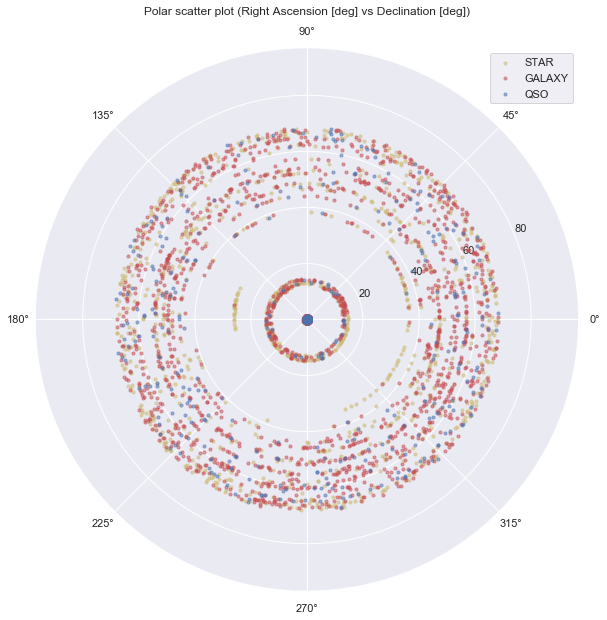

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, polar=True)
ax.scatter(splitted_df[2].ra, 
           splitted_df[2].dec,
           s=10, c='y',
           alpha=0.5,
           label = splitted_df[2]['class'].unique()[0])

ax.scatter(splitted_df[0].ra, 
           splitted_df[0].dec,
           marker='o', s=10, c='r',
           alpha = 0.5,
           label = splitted_df[0]['class'].unique()[0])

ax.scatter(splitted_df[1].ra,  
           splitted_df[1].dec,
           marker='o', s=10, c='b',
           alpha=0.5,
           label = splitted_df[1]['class'].unique()[0])
ax.legend()
plt.title('Polar scatter plot (Right Ascension [deg] vs Declination [deg])')
plt.show()

______________

In [34]:
df.groupby('class').size()

class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64

A continuación, se ofrecen las funciones de **densidad de probabilidad** de cada clase en redshift y en distancia [Mpc]. 

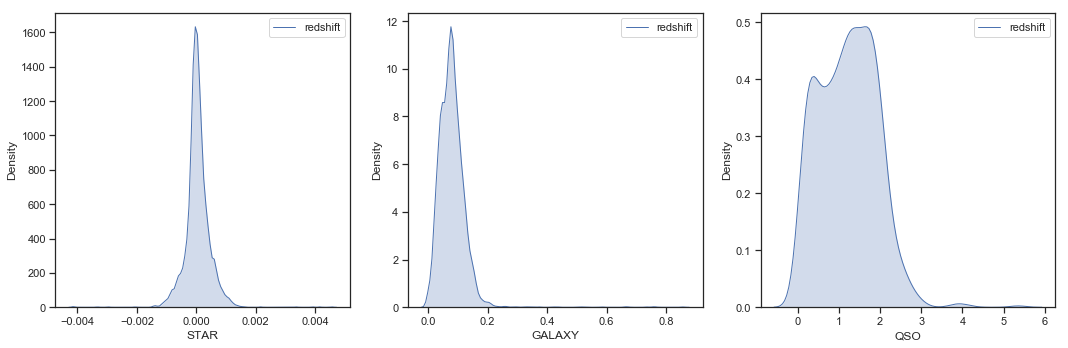

In [35]:
astrObjs = df['class'].unique()
featurecols = ['redshift']
plt.figure(figsize=(15,5))
sns.set_style("ticks")
for i in range(len(astrObjs)):
    plt.subplot(1, 3, i+1)
    for j in range(len(featurecols)):
        sns.distplot(df[df['class']==astrObjs[i]][featurecols[j]], 
                     hist = False, kde = True, 
                     kde_kws = {'shade': True, 'linewidth': 1}, 
                     label = featurecols[j])
    plt.legend()
    plt.xlabel(astrObjs[i])
    plt.ylabel('Density')
plt.tight_layout()

De acuerdo con los parámetros cosmológicos derivados de **Nine-Year Wilkinson Microwave Anisotropy Probe (WMAP) Observations**, publicación que podéis consultar [aquí](https://arxiv.org/pdf/1212.5226.pdf), se puede derivar la distancia de luminosidad de cada objeto haciendo uso de la librería `astropy`:

In [36]:
from astropy.cosmology import WMAP9 as cosmo

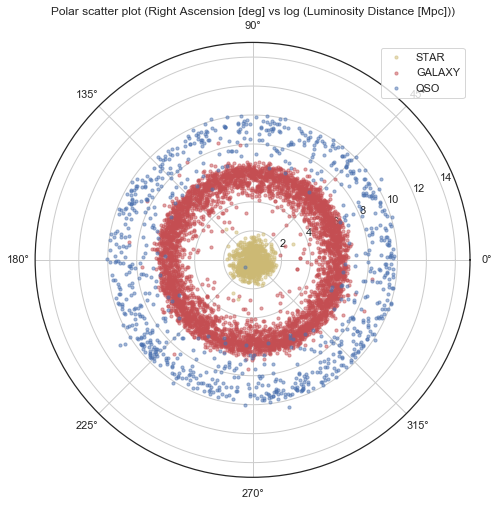

In [37]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
ax.scatter(splitted_df[2].ra, 
           np.log(cosmo.luminosity_distance(splitted_df[2].redshift).value), 
           s=10, c='y',
           alpha=0.5,
           label = splitted_df[2]['class'].unique()[0])

ax.scatter(splitted_df[0].ra, 
           np.log(cosmo.luminosity_distance(splitted_df[0].redshift).value), 
           marker='o', s=10, c='r',
           alpha = 0.5,
           label = splitted_df[0]['class'].unique()[0])

ax.scatter(splitted_df[1].ra, 
           np.log(cosmo.luminosity_distance(splitted_df[1].redshift).value), 
           marker='o', s=10, c='b',
           alpha=0.5,
           label = splitted_df[1]['class'].unique()[0])
ax.legend()
plt.title('Polar scatter plot (Right Ascension [deg] vs log (Luminosity Distance [Mpc]))')
plt.show()